In [13]:
import glob
from pathlib import Path
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
import cv2
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\FRO\Desktop\M2\Cours\Machine_learning\Projet\Alzheimers Dataset\train\**\*.jpg" 
file_list = list(glob.glob(path, recursive=True))
# transforme en data frame
chemin_train = pd.DataFrame(file_list)

# renomme la premiere colonnes
chemin_train.columns = ['chemin_dacces_photo']

In [5]:
chemin_train["nom_du_fichier"] = [Path(file).name.split("_grains")[0] for file in chemin_train["chemin_dacces_photo"]]

In [6]:
chemin_train["nom_des_dossiers"] = [str(Path(file).parent).split("\\")[6:] for file in chemin_train["chemin_dacces_photo"]]


In [7]:
chemin_train['group'] = chemin_train["nom_des_dossiers"].str[-1]    
chemin_train['group'].unique()

array(['MildDemented', 'ModerateDemented', 'NonDemented',
       'VeryMildDemented'], dtype=object)

In [8]:
chemin_train.loc[(chemin_train['group'] == 'NonDemented'), 'class'] = 0
chemin_train.loc[(chemin_train['group'] == 'ModerateDemented'), 'class'] = 1
chemin_train.loc[(chemin_train['group'] == 'MildDemented'), 'class'] = 2
chemin_train.loc[(chemin_train['group'] == 'VeryMildDemented'), 'class'] = 3

In [24]:
chemin_train['chemin_dacces_photo'].head()

0    C:\Users\FRO\Desktop\M2\Cours\Machine_learning...
1    C:\Users\FRO\Desktop\M2\Cours\Machine_learning...
2    C:\Users\FRO\Desktop\M2\Cours\Machine_learning...
3    C:\Users\FRO\Desktop\M2\Cours\Machine_learning...
4    C:\Users\FRO\Desktop\M2\Cours\Machine_learning...
Name: chemin_dacces_photo, dtype: object

In [15]:
chemin_train['array_photo'] = [cv2.imread(chemin) for chemin in chemin_train['chemin_dacces_photo']]

In [9]:
image = cv2.imread(r"C:\Users\FRO\Desktop\M2\Cours\Machine_learning\Projet\Alzheimers Dataset\train\VeryMildDemented\verymildDem9.jpg")

In [10]:
image = cv2.imread(chemin_train['chemin_dacces_photo'][0])

In [11]:
image.shape

(208, 176, 3)

In [44]:
cv2.imshow("Image", image)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

# fôret aléatoire 

In [19]:
liste_photo = np.array(chemin_train['array_photo'][:20])

In [26]:
(liste_photo[0].reshape(-1))

(109824,)

In [27]:

X = np.array([photo.reshape(-1) for photo in liste_photo])

In [28]:
X.shape

(20, 109824)

In [32]:
chemin_train.columns

Index(['chemin_dacces_photo', 'nom_du_fichier', 'nom_des_dossiers', 'group',
       'class', 'array_photo'],
      dtype='object')

In [37]:
y = np.array(chemin_train['class'][:20])
y.shape

(20,)

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=2000,
                                max_depth=120, # seulement 120 pixels sur 4096
                                random_state=1
                                )

In [38]:
forest.fit(X, y)

RandomForestClassifier(max_depth=120, n_estimators=2000, random_state=1)

In [39]:
imp = forest.feature_importances_
importances = imp.reshape(image.shape) 

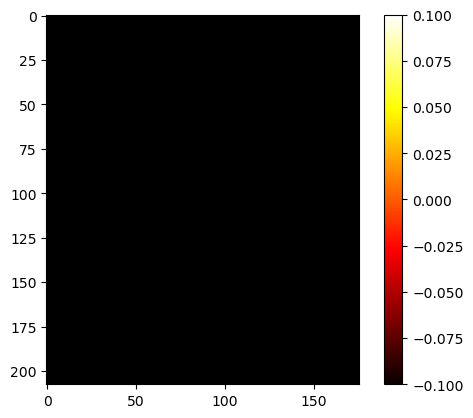

In [40]:
plt.imshow(importances, cmap='hot')
plt.colorbar()